In [1]:
#Lertas Giorgos 
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.Protein-protein interaction network

In [2]:
ppi=pd.read_csv('data/bio-decagon-ppi.csv')
ppi

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
...,...,...
715607,5634,5636
715608,5635,5636
715609,5635,5631
715610,5636,5631


In [3]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715612 entries, 0 to 715611
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Gene 1  715612 non-null  int64
 1   Gene 2  715612 non-null  int64
dtypes: int64(2)
memory usage: 10.9 MB


In [4]:
#no nan values
ppi.isnull().sum()

Gene 1    0
Gene 2    0
dtype: int64

In [5]:
ppi.nunique()

Gene 1    17544
Gene 2    17472
dtype: int64

The network has 17544 different proteins in the first column as Gene 1 and 17472 in the second as Gene 2. Also, it has 715612  physical interactions or observations.

In [6]:
ppi.max()

Gene 1    110255169
Gene 2    110255169
dtype: int64

In [7]:
ppi.min()

Gene 1    1
Gene 2    1
dtype: int64

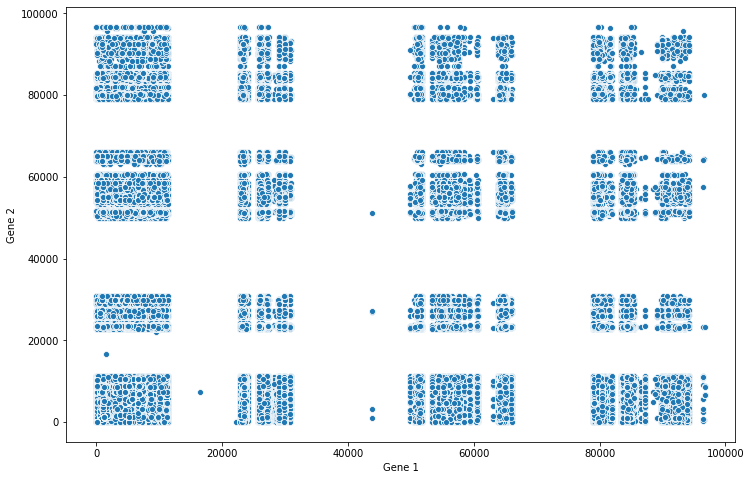

In [8]:
#plot ppi in proteins under 100.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi<100000]);

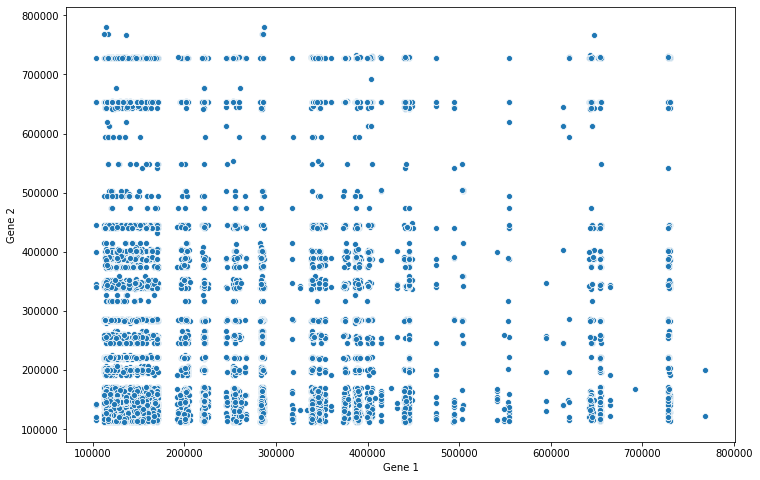

In [9]:
#plot ppi in proteins over 100.000 & under 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[(ppi>100000) & (ppi<1000000)]);

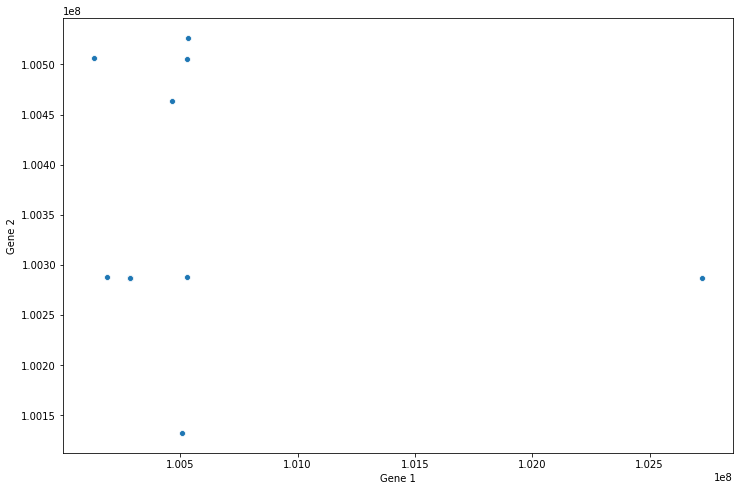

In [10]:
#plot ppi in proteins over 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi>1000000]);

We see that the data is in groups under 100.000 and between 100.000 and 1.000.000 is a little more sparse and from there on there are some extreme values

In [11]:
#number of unique values from Gene 1 and Gene 2 together
pd.concat([ppi['Gene 1'],ppi['Gene 2']]).nunique()

19081

In [12]:
#number of intersected values from Gene 1 and 2
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique()))

15935

### 2.Drug-target protein associations

In [13]:
targets=pd.read_csv('data/bio-decagon-targets.csv')
targets

,STITCH,Gene
0,CID000003488,1559
1,CID000003488,8647
2,CID000077992,3351
3,CID000077992,3350
4,CID000077992,3352
...,...,...
18685,CID000005152,8484
18686,CID000005152,81491
18687,CID000005152,83551
18688,CID000005152,680


In [14]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18690 entries, 0 to 18689
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STITCH  18690 non-null  object
 1   Gene    18690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 292.2+ KB


In [15]:
#no nan values
targets.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [16]:
targets.nunique()

STITCH     284
Gene      3648
dtype: int64

This association has 284 diffent drugs as STITCH (Search Tool for InTeractions of CHemicals) and 3648 different proteins. The matrix has 18690 instances.

In [17]:
#number of unique values from Gene 1, Gene 2 and Gene from targets dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets.Gene]).nunique()

19089

In [18]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets.Gene.nunique()))

15935

### 3.Drug-target protein associations culled from several curated databases

In [19]:
targets_all=pd.read_csv('data/bio-decagon-targets-all.csv')
targets_all

,STITCH,Gene
0,CID000060752,3757
1,CID006918155,2908
2,CID103052762,3359
3,CID023668479,1230
4,CID000028864,1269
...,...,...
131029,CID000092721,3426
131030,CID000092721,8858
131031,CID000092721,10942
131032,CID100115355,3242


In [20]:
targets_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131034 entries, 0 to 131033
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   STITCH  131034 non-null  object
 1   Gene    131034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [21]:
#no nan values
targets_all.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [22]:
targets_all.nunique()

STITCH    1774
Gene      7795
dtype: int64

This association has more drugs than before, 1774 drugs as STITCH (Search Tool for InTeractions of CHemicals) and 7795 different proteins. Also, the dataframe has 131034 instances.

In [23]:
#number of unique values from Gene 1, Gene 2 and Gene from targets_all dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets_all.Gene]).nunique()

19122

In [24]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets_all dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets_all.Gene.nunique()))

15935

### 4.Polypharmacy side effects in the form of (drug A, side effect type, drug B) triples.

In [25]:
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo

,STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4649436,CID000003461,CID000003954,C0149871,deep vein thromboses
4649437,CID000003461,CID000003954,C0035410,rhabdomyolysis
4649438,CID000003461,CID000003954,C0043096,loss of weight
4649439,CID000003461,CID000003954,C0003962,ascites


In [26]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649441 entries, 0 to 4649440
Data columns (total 4 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   STITCH 1                  object
 1   STITCH 2                  object
 2   Polypharmacy Side Effect  object
 3   Side Effect Name          object
dtypes: object(4)
memory usage: 141.9+ MB


In [27]:
#no nan values
combo.isnull().sum()

STITCH 1                    0
STITCH 2                    0
Polypharmacy Side Effect    0
Side Effect Name            0
dtype: int64

In [28]:
combo.nunique()

STITCH 1                     616
STITCH 2                     634
Polypharmacy Side Effect    1317
Side Effect Name            1317
dtype: int64

In this dataframe, we can see 616 different drugs as STITCH 1 and 634 diffent drugs as STITCH 2. Also, Polypharmacy Side Effect and Side Effect Name are 1317 and the observations are 4649441

In [29]:
#different drugs from 2 columns
pd.concat([combo['STITCH 1'],combo['STITCH 2']]).nunique()

645

In [30]:
#number of intersected values from STITCH 1 and STITCH 2
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique()))

605

In [31]:
#different drugs from combo and targets dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

645

In [32]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets.STITCH.nunique()))

605

In [33]:
#different drugs from combo and targets_all dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets_all.STITCH]).nunique()

2135

In [34]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets_all dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets_all.Gene.nunique()))

605

### 5.Side effects of individual drugs in the form of (drug A, side effect type) tuples.

In [35]:
mono=pd.read_csv('data/bio-decagon-mono.csv')
mono

,STITCH,Individual Side Effect,Side Effect Name
0,CID003062316,C1096328,central nervous system mass
1,CID003062316,C0162830,Photosensitivity reaction
2,CID003062316,C1611725,leukaemic infiltration brain
3,CID003062316,C0541767,platelet adhesiveness abnormal
4,CID003062316,C0242973,Ventricular dysfunction
...,...,...,...
174972,CID005282226,C1096278,anterior chamber inflammation
174973,CID005282226,C0272412,splenic abscess
174974,CID005282226,C0860013,hepatitis b antibody positive
174975,CID005282226,C0853225,international normalised ratio increased


In [36]:
#no nan values
mono.isnull().sum()

STITCH                    0
Individual Side Effect    0
Side Effect Name          0
dtype: int64

In [37]:
mono.nunique()

STITCH                      639
Individual Side Effect    10184
Side Effect Name           9702
dtype: int64

This table has 174977 rows and 639 drugs as STITCH. Also, the columns Individual Side Effect and Side Effect Name have 
10184 and 9702 observations respectively.

In [38]:
#different drugs from combo and mono dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],mono.STITCH]).nunique()

645

In [39]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from mono dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), mono.STITCH.nunique()))

605

### 6.Side effect categories

In [40]:
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


In [41]:
#no nan values
effectcategories.isnull().sum()

Side Effect         0
Side Effect Name    0
Disease Class       0
dtype: int64

In [42]:
effectcategories.nunique()

Side Effect         561
Side Effect Name    561
Disease Class        37
dtype: int64

This dataframe has 561 observations, which they are uniquely 'Side Effect' ids and 'Side Effect Name' as column names, and it has 37 different names in 'Disease Class'.

### 7.Code from main.py

In [43]:
import networkx as nx
import scipy.sparse as sp
from itertools import combinations

val_test_size = 0.05
n_genes = 500
n_drugs = 400
n_drugdrug_rel_types = 3

#####graph creation with 500 peaks, 50 peaks in each group
gene_net = nx.planted_partition_graph(50, 10, 0.2, 0.05, seed=42)

gene_adj = nx.adjacency_matrix(gene_net)
gene_degrees = np.array(gene_adj.sum(axis=0)).squeeze()

gene_drug_adj = sp.csr_matrix((10 * np.random.randn(n_genes, n_drugs) > 15).astype(int))
drug_gene_adj = gene_drug_adj.transpose(copy=True)

drug_drug_adj_list = []
tmp = np.dot(drug_gene_adj, gene_drug_adj)
for i in range(n_drugdrug_rel_types):
    mat = np.zeros((n_drugs, n_drugs))
    for d1, d2 in combinations(list(range(n_drugs)), 2):
        if tmp[d1, d2] == i + 4:
            mat[d1, d2] = mat[d2, d1] = 1.
    drug_drug_adj_list.append(sp.csr_matrix(mat))
drug_degrees_list = [np.array(drug_adj.sum(axis=0)).squeeze() for drug_adj in drug_drug_adj_list]

##### printing  

In [44]:
len(gene_net.nodes)

500

In [45]:
len(gene_net.edges)

6639

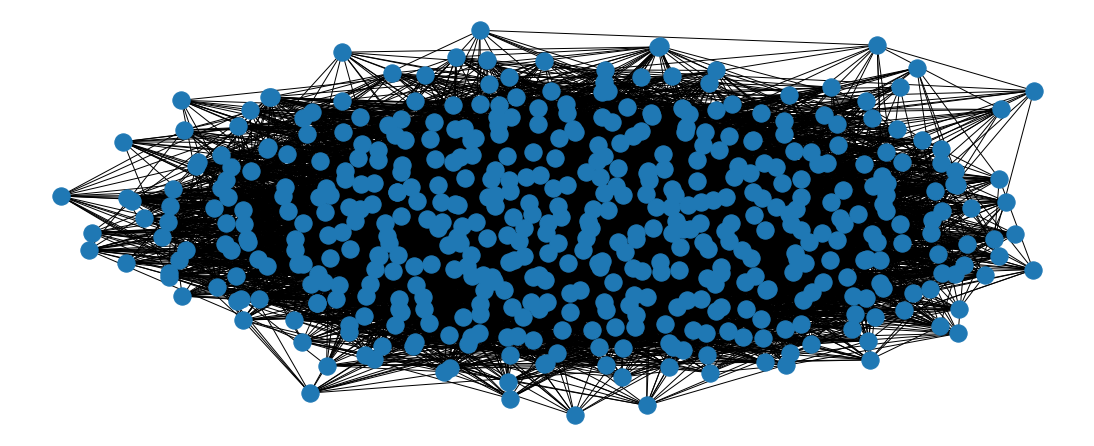

In [46]:
plt.figure(figsize=(15,6))
nx.draw(gene_net)
plt.show()

In [47]:
#open csv and skip headers row
with open('data/bio-decagon-ppi.csv', 'rb') as row:
    next(row, '')   # skip a line
    gene_net = nx.read_edgelist(row, delimiter=',')

In [48]:
###REPLACEMENT
ppi=pd.read_csv('data/bio-decagon-ppi.csv')
targets=pd.read_csv('data/bio-decagon-targets.csv')
combo=pd.read_csv('data/bio-decagon-combo.csv')

#sampling
ppi=ppi.sample(frac=0.1, random_state=10)
targets=targets.sample(frac=0.1, random_state=10)
combo=combo.sample(frac=0.1, random_state=10)

gene_net = nx.from_pandas_edgelist(ppi,'Gene 1', 'Gene 2')
gene_adj = nx.adjacency_matrix(gene_net)
gene_degrees = np.array(gene_adj.sum(axis=0)).squeeze()

gene_drug_adj = nx.from_pandas_edgelist(targets,'STITCH', 'Gene')
gene_drug_adj = nx.adjacency_matrix(gene_drug_adj)
drug_gene_adj = gene_drug_adj.transpose(copy=True)

drug_drug_adj_list = []
grouped = combo.groupby('Polypharmacy Side Effect')
for name, group in grouped:
    drug_drug_adj_list.append(nx.adjacency_matrix(nx.from_pandas_edgelist(group,'STITCH 1', 'STITCH 2')))
drug_degrees_list = [np.array(drug_adj.sum(axis=0)).squeeze() for drug_adj in drug_drug_adj_list]

val_test_size = 0.05
n_genes = len(gene_net.nodes)
n_drugs = pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

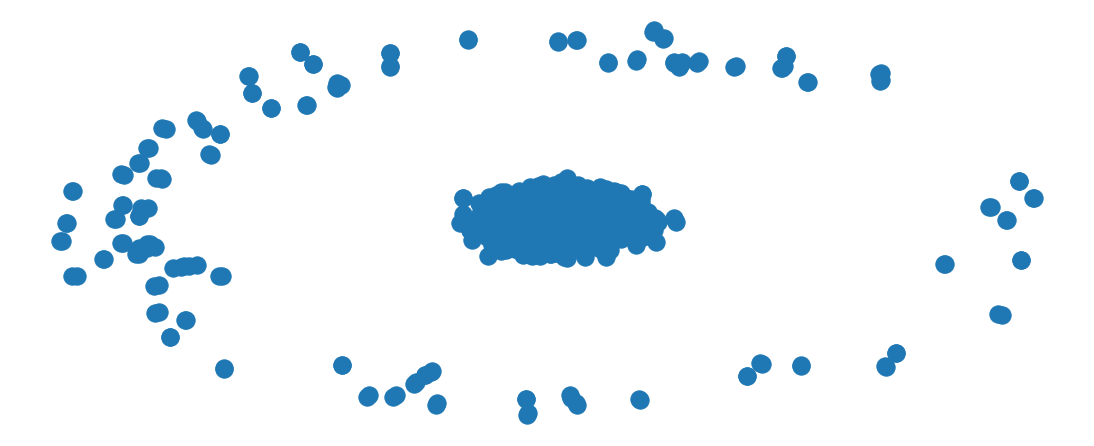

In [49]:
plt.figure(figsize=(15,6))
nx.draw(gene_net)
plt.show()